<Figure size 1400x700 with 0 Axes>

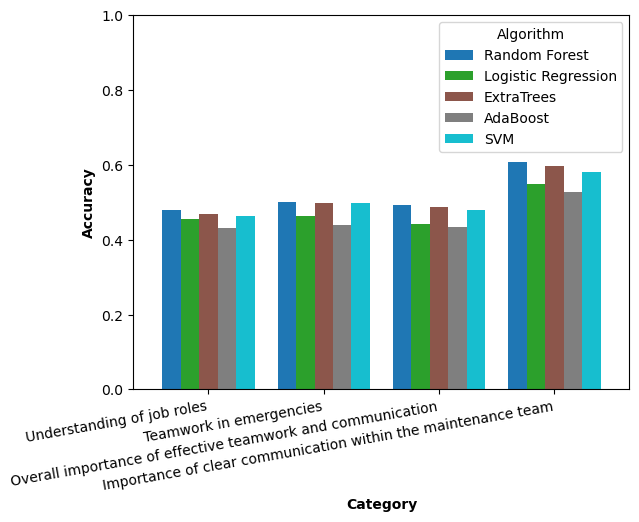

<Figure size 1400x700 with 0 Axes>

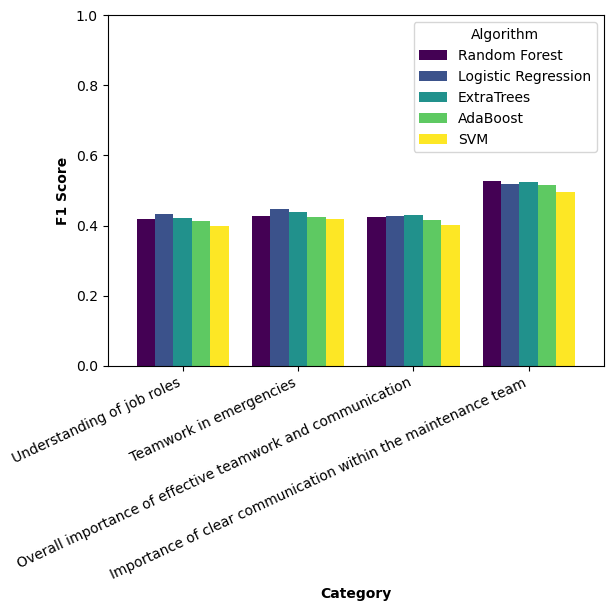

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
# -------------------------------
# Define the categories
categories = [
    "Understanding of job roles",
    "Teamwork in emergencies",
    "Overall importance of effective teamwork and communication",
    "Importance of clear communication within the maintenance team"
]

# Define the results for each algorithm per category
accuracy_data = {
    "Random Forest": [0.4790, 0.5000, 0.4928, 0.6084],
    "Logistic Regression": [0.4544, 0.4643, 0.4431, 0.5478],
    "ExtraTrees": [0.4677, 0.4992, 0.4863, 0.5960],
    "AdaBoost": [0.4307, 0.4406, 0.4350, 0.5283],
    "SVM": [0.4628, 0.4979, 0.4784, 0.5812]
}

f1_data = {
    "Random Forest": [0.4178, 0.4283, 0.4236, 0.5268],
    "Logistic Regression": [0.4342, 0.4459, 0.4282, 0.5188],
    "ExtraTrees": [0.4219, 0.4392, 0.4305, 0.5244],
    "AdaBoost": [0.4128, 0.4247, 0.4161, 0.5146],
    "SVM": [0.3977, 0.4177, 0.4018, 0.4955]
}

# Convert to DataFrames for convenience
df_accuracy = pd.DataFrame(accuracy_data, index=categories)
df_f1 = pd.DataFrame(f1_data, index=categories)

# --- Plot Accuracy ---
plt.figure(figsize=(14, 7))
df_accuracy.plot(kind='bar', width=0.8, colormap='tab10')
#plt.title("Accuracy per Category for Different Algorithms", fontweight='bold')
plt.xlabel("Category", fontweight='bold')
plt.ylabel("Accuracy", fontweight='bold')
plt.xticks(rotation=10, ha='right')  # Rotate for better readability
plt.ylim(0, 1)
plt.legend(title="Algorithm", loc='upper right')
plt.subplots_adjust(bottom=0.10)  # Ensure enough space for long labels
plt.show()

# --- Plot F1 Score ---
plt.figure(figsize=(14, 7))
df_f1.plot(kind='bar', width=0.8, colormap='viridis')
#plt.title("F1 Score per Category for Different Algorithms", fontweight='bold')
plt.xlabel("Category", fontweight='bold')
plt.ylabel("F1 Score", fontweight='bold')
plt.xticks(rotation=25, ha='right')  # Rotate for better readability
plt.ylim(0, 1)
plt.legend(title="Algorithm", loc='upper right')
plt.subplots_adjust(bottom=0.15)  # Ensure enough space for long labels
plt.show()


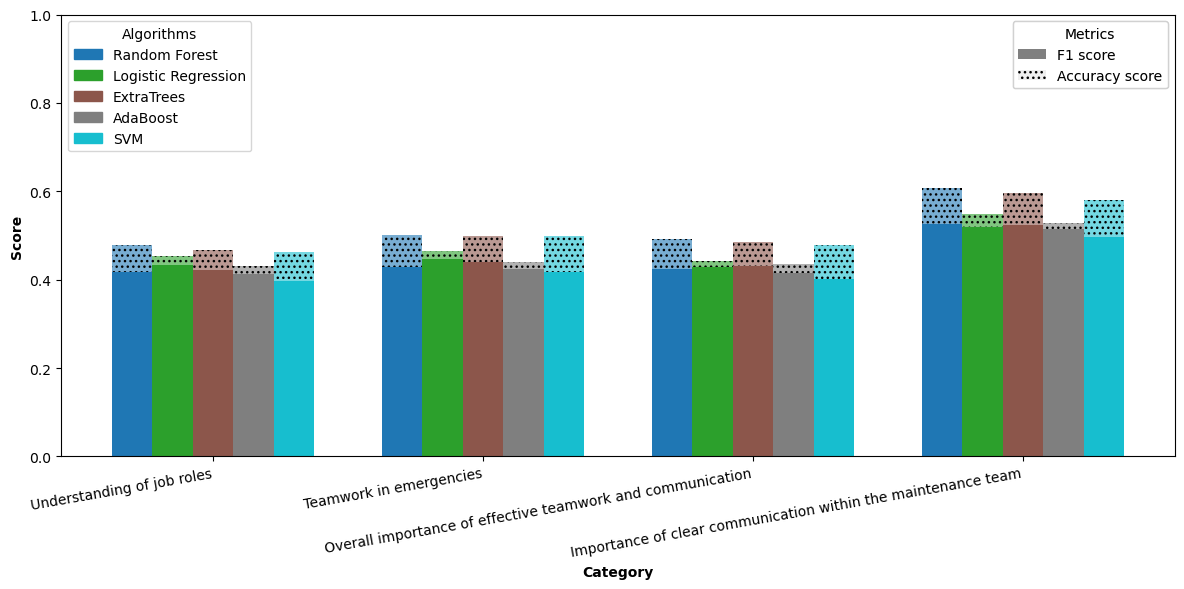

In [ ]:



# 4) Basic plot setup
fig, ax = plt.subplots(figsize=(12, 6))

algorithms = df_accuracy.columns
x = np.arange(len(categories))   # x positions for each category
bar_width = 0.15                # width of each bar
colors = plt.cm.tab10(np.linspace(0, 1, len(algorithms)))

# 5) Plot stacked bars for each algorithm & category
for i, alg in enumerate(algorithms):
    bar_positions = x + i * bar_width
    
    # --- F1 portion (solid) ---
    ax.bar(
        bar_positions,
        df_f1[alg],
        width=bar_width,
        color=colors[i],
        label=alg if i == 0 else ""  # only label once for the color legend
    )
    
    # --- Accuracy portion (dotted) ---
    #   This is the difference from F1 up to Accuracy
    difference = df_accuracy[alg] - df_f1[alg]
    ax.bar(
        bar_positions,
        difference,
        width=bar_width,
        bottom=df_f1[alg],      # start from the top of the F1 bar
        color=colors[i],
        hatch='...',            # dotted hatch
        alpha=0.6,              # slightly transparent, so the hatch is visible
        label=""  # no repeated label for the color
    )

# 6) Configure x-axis
ax.set_xticks(x + (len(algorithms) - 1) * bar_width / 2)
ax.set_xticklabels(categories, rotation=10, ha='right')

# 7) Set y-axis limit (both F1 and Accuracy are between 0 and 1)
ax.set_ylim(0, 1)

# 8) Labels
ax.set_xlabel("Category", fontweight='bold')
ax.set_ylabel("Score", fontweight='bold')
#ax.set_title("F1 vs. Accuracy (Stacked Bars)", fontweight='bold')

# 9) Create two separate legends:
#    (a) One legend for the algorithm colors
#    (b) Another legend for the fill style (F1 portion vs. Accuracy portion)

# (a) Algorithm legend
handles_alg, labels_alg = [], []
for i, alg in enumerate(algorithms):
    patch = mpatches.Patch(color=colors[i], label=alg)
    handles_alg.append(patch)
    labels_alg.append(alg)
alg_legend = ax.legend(handles=handles_alg, labels=labels_alg, title="Algorithms", loc='upper left')
ax.add_artist(alg_legend)  # add this legend first so we can add a second legend

# (b) Fill style legend (F1 portion vs. top dotted portion)
f1_patch = mpatches.Patch(facecolor="gray", label="F1 score")
acc_patch = mpatches.Patch(facecolor="gray", hatch='...', alpha=0.1, label="Accuracy score")

score_legend = ax.legend(handles=[f1_patch, acc_patch], title="Metrics", loc='upper right')
ax.add_artist(score_legend)

plt.tight_layout()
plt.show()


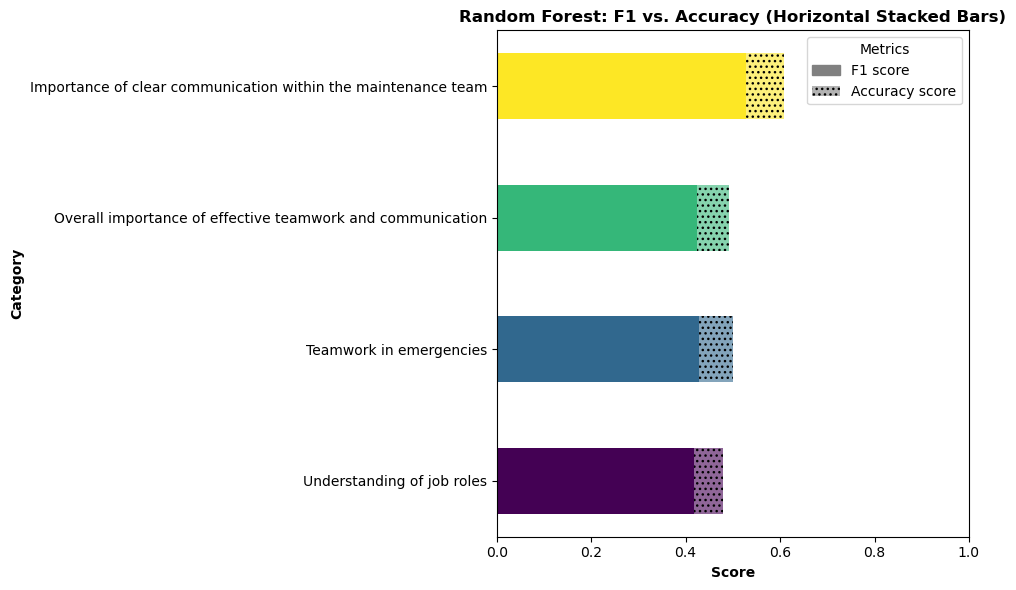

In [ ]:


# 4) Filter only Random Forest results
rf_accuracy = df_accuracy["Random Forest"]
rf_f1 = df_f1["Random Forest"]
rf_difference = rf_accuracy - rf_f1

# 5) Plot horizontal stacked bars with viridis colors for each category
fig, ax = plt.subplots(figsize=(10, 6))

# y positions and bar height
y_positions = np.arange(len(categories))
bar_height = 0.5

# Generate a distinct color for each category from the viridis palette
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Plot the F1 portion (solid bars)
ax.barh(y_positions, rf_f1, height=bar_height, color=colors, label="F1 score")

# Plot the additional Accuracy portion (stacked on top of F1) with dotted hatch
ax.barh(y_positions, rf_difference, height=bar_height, left=rf_f1,
        color=colors, hatch='...', alpha=0.6, label="Accuracy score")

# Configure y-axis with category labels
ax.set_yticks(y_positions)
ax.set_yticklabels(categories)
ax.set_xlim(0, 1)

# Set labels and title
ax.set_xlabel("Score", fontweight='bold')
ax.set_ylabel("Category", fontweight='bold')
ax.set_title("Random Forest: F1 vs. Accuracy (Horizontal Stacked Bars)", fontweight='bold')

# Create legend patches (using a representative color from the viridis palette)
rep_color = plt.cm.viridis(0.5)
f1_patch = mpatches.Patch(color='grey', label="F1 score")
acc_patch = mpatches.Patch(facecolor='grey', hatch='...', alpha=0.6, label="Accuracy score")
ax.legend(handles=[f1_patch, acc_patch], title="Metrics", loc='upper right')

plt.tight_layout()
plt.show()


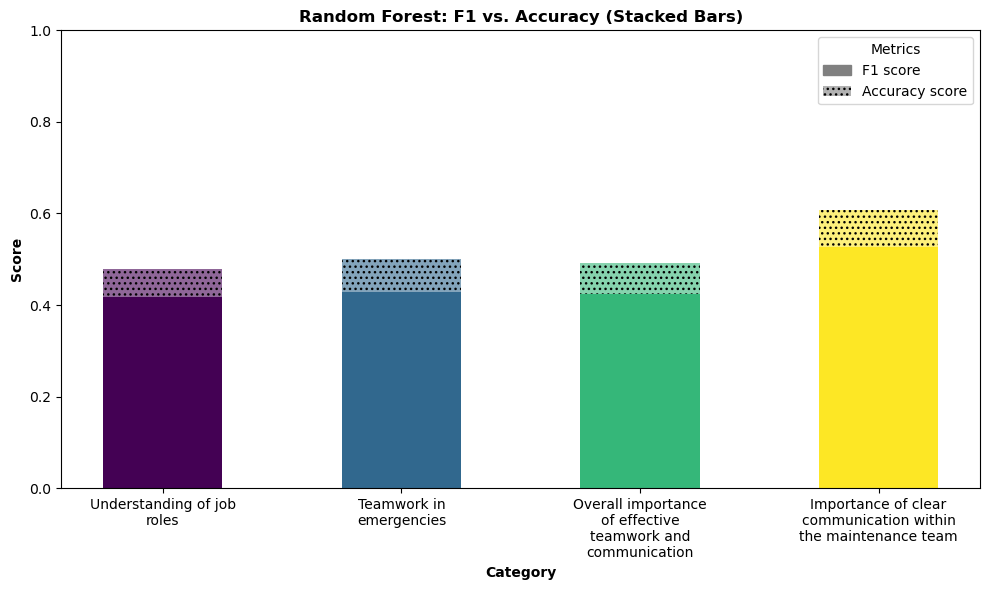

In [ ]:
import textwrap


# 4) Filter only Random Forest results
rf_accuracy = df_accuracy["Random Forest"]
rf_f1 = df_f1["Random Forest"]
rf_difference = rf_accuracy - rf_f1

# 5) Wrap the category names (to avoid long, confusing labels)
wrapped_categories = ['\n'.join(textwrap.wrap(cat, width=20)) for cat in categories]

# 6) Plot vertical stacked bars with distinct viridis colors for each category
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(categories))
bar_width = 0.5

# Generate a distinct color for each category from the viridis palette
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

# Plot the F1 portion (base part of the stacked bar)
ax.bar(x, rf_f1, width=bar_width, color=colors, label="F1 score")

# Plot the remaining Accuracy portion (stacked on top of F1)
ax.bar(x, rf_difference, width=bar_width, bottom=rf_f1, color=colors,
       hatch='...', alpha=0.6, label="Accuracy score")

# Configure x-axis with wrapped category labels
ax.set_xticks(x)
ax.set_xticklabels(wrapped_categories, rotation=0, ha='center')
ax.set_ylim(0, 1)

# Labels and title
ax.set_xlabel("Category", fontweight='bold')
ax.set_ylabel("Score", fontweight='bold')
ax.set_title("Random Forest: F1 vs. Accuracy (Stacked Bars)", fontweight='bold')

# Create legend patches (using a representative viridis color)
rep_color = plt.cm.viridis(0.5)
f1_patch = mpatches.Patch(color="grey", label="F1 score")
acc_patch = mpatches.Patch(facecolor="grey", hatch='...', alpha=0.6, label="Accuracy score")
ax.legend(handles=[f1_patch, acc_patch], title="Metrics", loc='upper right')

plt.tight_layout()
plt.show()


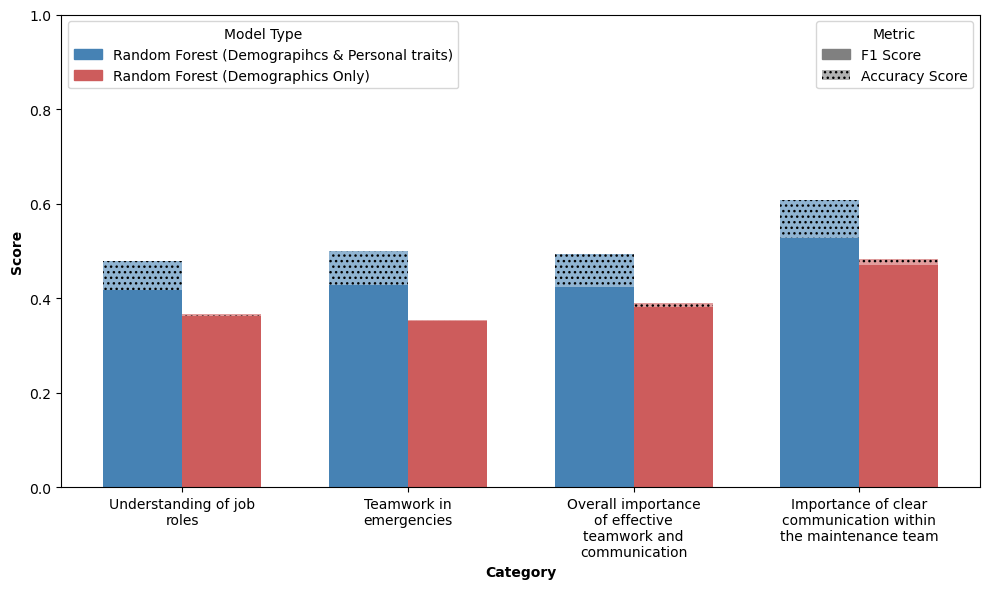

In [ ]:


# -------------------------------
# Define the categories
# -------------------------------
categories = [
    "Understanding of job roles",
    "Teamwork in emergencies",
    "Overall importance of effective teamwork and communication",
    "Importance of clear communication within the maintenance team"
]

# -------------------------------
# Provided Random Forest (All Features) results (from the script)
# -------------------------------
# (These values come from the original script's arrays)
rf_f1 = np.array([0.4178, 0.4283, 0.4236, 0.5268])
rf_acc = np.array([0.4790, 0.5000, 0.4928, 0.6084])
rf_diff = rf_acc - rf_f1  # This represents the top (hatched) portion

# -------------------------------
# Provided Random Forest Only Demographics results
# -------------------------------
demo_f1 = np.array([0.3621, 0.3510, 0.3814, 0.4700])
demo_acc = np.array([0.3657, 0.3545, 0.3886, 0.4820])
demo_diff = demo_acc - demo_f1

# -------------------------------
# Wrap category names for clarity
# -------------------------------
wrapped_categories = ['\n'.join(textwrap.wrap(cat, width=20)) for cat in categories]

# -------------------------------
# Plotting grouped vertical stacked bars
# -------------------------------
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(categories))
bar_width = 0.35
offset = bar_width / 2

# Plot the "RF (All Features)" bars (positioned to the left of center)
bars_rf_bottom = ax.bar(x - offset, rf_f1, width=bar_width, color="steelblue",
                        label="RF (All Features) F1")
bars_rf_top = ax.bar(x - offset, rf_diff, width=bar_width, bottom=rf_f1,
                     color="steelblue", hatch='...', alpha=0.6,
                     label="RF (All Features) Accuracy")

# Plot the "RF (Demo Only)" bars (positioned to the right of center)
bars_demo_bottom = ax.bar(x + offset, demo_f1, width=bar_width, color="indianred",
                          label="RF (Demo Only) F1")
bars_demo_top = ax.bar(x + offset, demo_diff, width=bar_width, bottom=demo_f1,
                       color="indianred", hatch='...', alpha=0.6,
                       label="RF (Demo Only) Accuracy")

# Configure x-axis with wrapped category labels
ax.set_xticks(x)
ax.set_xticklabels(wrapped_categories, rotation=0, ha='center')
ax.set_ylim(0, 1)
ax.set_xlabel("Category", fontweight='bold')
ax.set_ylabel("Score", fontweight='bold')
#ax.set_title("Random Forest Comparison: F1 vs. Accuracy", fontweight='bold')

# Create custom legend entries:
# One legend for model type (colors) and one for metric (stacking)
model_rf_patch = mpatches.Patch(color="steelblue", label="Random Forest (Demograpihcs & Personal traits)")
model_demo_patch = mpatches.Patch(color="indianred", label="Random Forest (Demographics Only)")
metric_f1_patch = mpatches.Patch(color="grey", label="F1 Score")
metric_acc_patch = mpatches.Patch(facecolor="grey", hatch='...', alpha=0.6, label="Accuracy Score")

legend1 = ax.legend(handles=[model_rf_patch, model_demo_patch], title="Model Type", loc='upper left')
ax.add_artist(legend1)
legend2 = ax.legend(handles=[metric_f1_patch, metric_acc_patch], title="Metric", loc='upper right')

plt.tight_layout()
plt.show()


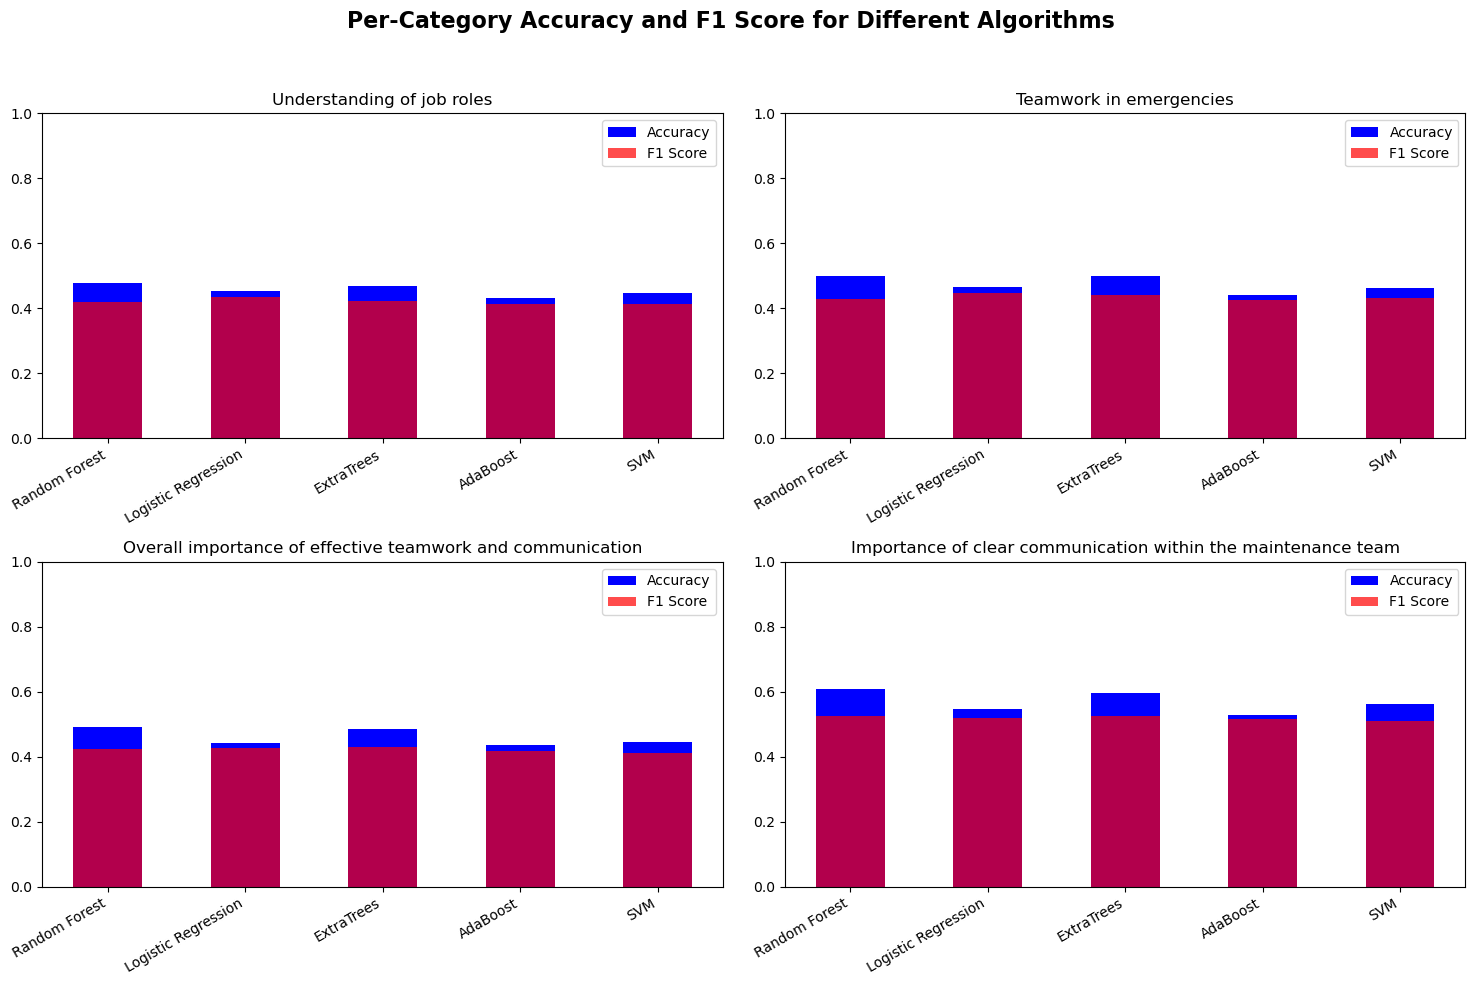

In [ ]:


# Define the algorithms and categories
algorithms = ['Random Forest', 'Logistic Regression', 'ExtraTrees', 'AdaBoost', 'SVM']
categories = [
    "Understanding of job roles",
    "Teamwork in emergencies",
    "Overall importance of effective teamwork and communication",
    "Importance of clear communication within the maintenance team"
]

# Results per category for each algorithm (Accuracy & F1 Score)
acc_data = {
    "Understanding of job roles": [0.4790, 0.4544, 0.4677, 0.4307, 0.4468],
    "Teamwork in emergencies": [0.5000, 0.4643, 0.4992, 0.4406, 0.4623],
    "Overall importance of effective teamwork and communication": [0.4928, 0.4431, 0.4863, 0.4350, 0.4444],
    "Importance of clear communication within the maintenance team": [0.6084, 0.5478, 0.5960, 0.5283, 0.5614]
}

f1_data = {
    "Understanding of job roles": [0.4178, 0.4342, 0.4219, 0.4128, 0.4122],
    "Teamwork in emergencies": [0.4283, 0.4459, 0.4392, 0.4247, 0.4317],
    "Overall importance of effective teamwork and communication": [0.4236, 0.4282, 0.4305, 0.4161, 0.4101],
    "Importance of clear communication within the maintenance team": [0.5268, 0.5188, 0.5244, 0.5146, 0.5103]
}

# Create subplots: one per category
num_categories = len(categories)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

x = np.arange(len(algorithms))
bar_width = 0.5  # Adjusted width for better visibility

for i, cat in enumerate(categories):
    ax = axes[i]
    acc = acc_data[cat]
    f1 = f1_data[cat]

    # Accuracy (Base Bar in Blue)
    ax.bar(x, acc, bar_width, color="blue", label="Accuracy")

    # F1 Score (Overlay in Red with transparency)
    ax.bar(x, f1, bar_width, color="red", alpha=0.7, label="F1 Score")

    ax.set_title(cat, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(algorithms, rotation=30, ha='right')
    ax.set_ylim(0, 1)
    ax.legend()

plt.suptitle("Per-Category Accuracy and F1 Score for Different Algorithms", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


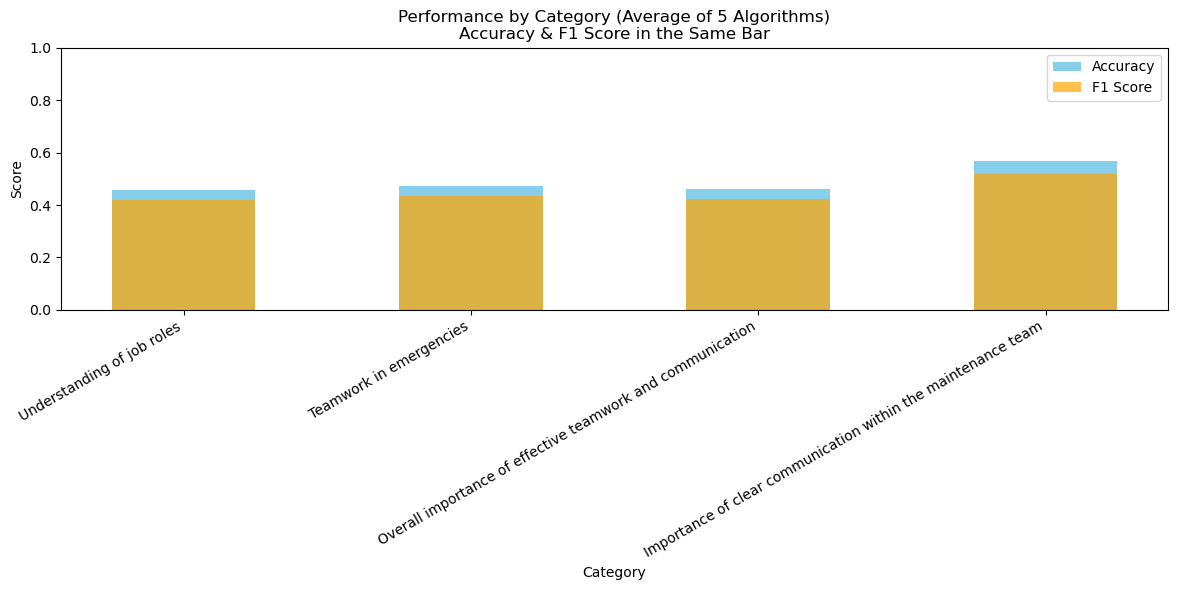

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Categories
categories = [
    "Understanding of job roles",
    "Teamwork in emergencies",
    "Overall importance of effective teamwork and communication",
    "Importance of clear communication within the maintenance team"
]

# Accuracy and F1 results for FIVE algorithms (including SVM) per category
acc_data = {
    "Understanding of job roles": [0.4790, 0.4544, 0.4677, 0.4307, 0.4468],
    "Teamwork in emergencies": [0.5000, 0.4643, 0.4992, 0.4406, 0.4623],
    "Overall importance of effective teamwork and communication": [0.4928, 0.4431, 0.4863, 0.4350, 0.4444],
    "Importance of clear communication within the maintenance team": [0.6084, 0.5478, 0.5960, 0.5283, 0.5614]
}

f1_data = {
    "Understanding of job roles": [0.4178, 0.4342, 0.4219, 0.4128, 0.4122],
    "Teamwork in emergencies": [0.4283, 0.4459, 0.4392, 0.4247, 0.4317],
    "Overall importance of effective teamwork and communication": [0.4236, 0.4282, 0.4305, 0.4161, 0.4101],
    "Importance of clear communication within the maintenance team": [0.5268, 0.5188, 0.5244, 0.5146, 0.5103]
}

# 1) Compute average Accuracy and F1 for each category
avg_accuracy = []
avg_f1 = []

for cat in categories:
    # Average across the 5 algorithms (4 previous + SVM)
    avg_acc = np.mean(acc_data[cat])
    avg_f = np.mean(f1_data[cat])
    avg_accuracy.append(avg_acc)
    avg_f1.append(avg_f)

# 2) Create a single bar for each category:
#    - Full bar for Accuracy (skyblue)
#    - Overlay bar for F1 (orange), partially covering the Accuracy bar.
x = np.arange(len(categories))
bar_width = 0.5

plt.figure(figsize=(12, 6))

# Accuracy bars
plt.bar(x, avg_accuracy, bar_width, color="skyblue", label="Accuracy")

# F1 Score overlay
plt.bar(x, avg_f1, bar_width, color="orange", alpha=0.7, label="F1 Score")

# 3) Customize axes & labels
plt.xticks(ticks=x, labels=categories, rotation=30, ha='right')
plt.xlabel("Category")
plt.ylabel("Score")
plt.title("Performance by Category (Average of 5 Algorithms)\nAccuracy & F1 Score in the Same Bar")
plt.ylim(0, 1)  # Adjust if needed

plt.legend()
plt.tight_layout()
plt.show()
